# Visão Computacional

A visão computacional é um campo da inteligência artificial que capacita computadores a interpretar e processar informações visuais do mundo. As aplicações incluem reconhecimento de imagens, detecção de objetos, rastreamento de movimento, etc. Para trabalhar com visão computacional, usaremos bibliotecas populares como `numpy` e `cv2`.

### Importando Bibliotecas
Para começar, vamos importar as bibliotecas necessárias: numpy para manipulação de matrizes e matplotlib para visualização.

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [196]:
# Definindo uma função auxiliar para exibir imagens
def show_image(img, title='Image', cmap_type='gray', figsize=(4, 4), vmin=0, vmax=255):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap=cmap_type, vmin=vmin, vmax=vmax)
    plt.title(title)
    plt.axis('off')
    plt.show()

### Criando uma Imagem
Em visão computacional, uma imagem é representada como uma matriz de pixels. Cada pixel tem um valor de intensidade. Para imagens em escala de cinza, o valor varia de 0 a 255, onde 0 representa preto, 255 representa branco e os valores intermediários representam diferentes tons de cinza. Vamos criar uma imagem preta de 100x100 pixels. Cada pixel tem um valor de intensidade de 0.

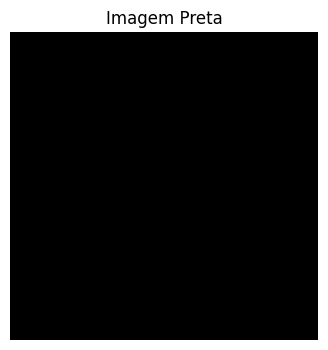

In [197]:
black_image = np.zeros((100, 100), dtype=np.uint8)

show_image(black_image, title='Imagem Preta')

### Desenhando um Ponto
Para desenhar um ponto em uma imagem, precisamos modificar o valor de intensidade de um pixel específico. As coordenadas dos pixels são representadas por (y, x), onde y é a linha e x é a coluna. Vamos desenhar um ponto branco (intensidade 255) no centro da imagem preta.

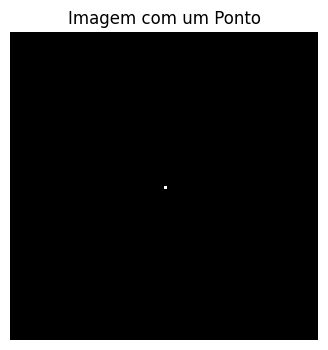

In [198]:
black_image[50, 50] = 255

show_image(black_image, title='Imagem com um Ponto')

### Desenhando um Retângulo
Para desenhar um retângulo, precisamos modificar os valores de intensidade de um conjunto de pixels que formam a forma desejada. Vamos desenhar um retângulo branco na imagem preta. O retângulo terá coordenadas de (25, 40) a (75, 60).

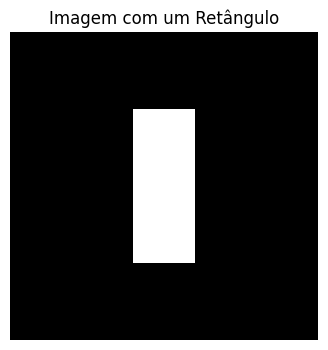

In [199]:
rectangle_image = np.zeros((100, 100), dtype=np.uint8)

for y in range(25, 75):
    for x in range(40, 60):
        rectangle_image[y, x] = 255

show_image(rectangle_image, title='Imagem com um Retângulo')

### Desenhando um Círculo
Para desenhar um círculo, precisamos modificar os valores de intensidade dos pixels que estão dentro de uma determinada distância (raio) de um ponto central. Vamos desenhar um círculo branco com centro em (50, 50) e raio de 25 pixels.

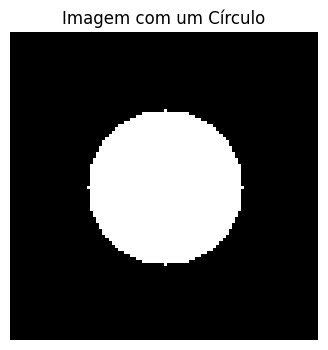

In [200]:
circle_image = np.zeros((100, 100), dtype=np.uint8)
center = (50, 50)
radius = 25

for y in range(100):
    for x in range(100):
        dist = (x - center[0])**2 + (y - center[1])**2
        if dist <= radius**2:
            circle_image[y, x] = 255

show_image(circle_image, title='Imagem com um Círculo')

### Criando um Gradiente
Um gradiente é uma transição suave de uma cor para outra. Vamos criar uma imagem com um gradiente horizontal de cor, indo do preto ao branco. O valor de cada pixel será interpolado entre as cores inicial e final.

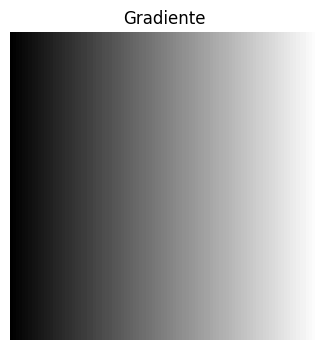

In [201]:
def create_gradient(width, height, start_color, end_color):
    gradient_image = np.zeros((height, width), dtype=np.uint8)

    for x in range(width):
        color = start_color + (end_color - start_color) * (x / (width - 1))
        gradient_image[:, x] = color
    
    return gradient_image

gradient_image = create_gradient(100, 100, 0, 255)
show_image(gradient_image, title='Gradiente')

### Carregando Imagens Grayscale
A imagem Lenna é uma imagem amplamente utilizada em processamento de imagens. Vamos carregá-la em escala de cinza. Em grayscale, cada pixel tem um valor de intensidade entre 0 e 255.

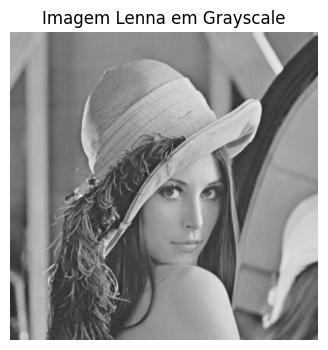

In [202]:
import cv2

lenna_gray = cv2.imread('data/lenna.png', cv2.IMREAD_GRAYSCALE)

show_image(lenna_gray, title='Imagem Lenna em Grayscale')

### Carregando Imagens Coloridas
Vamos carregar a mesma imagem em cores (RGB). Em imagens RGB, cada pixel é representado por três valores que correspondem às intensidades das cores vermelho, verde e azul.

Shape: (512, 512, 3)


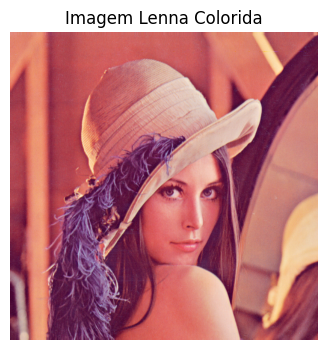

In [203]:
lenna_color = cv2.imread('data/lenna.png')
lenna_color = cv2.cvtColor(lenna_color, cv2.COLOR_BGR2RGB)

print("Shape:", lenna_color.shape)

show_image(lenna_color, title='Imagem Lenna Colorida')

### Explorando os Canais de Cor RGB
Vamos separar os canais de cor (R, G, B) da imagem colorida e visualizá-los individualmente. Cada canal é uma imagem em escala de cinza que representa a intensidade da respectiva cor em cada pixel.

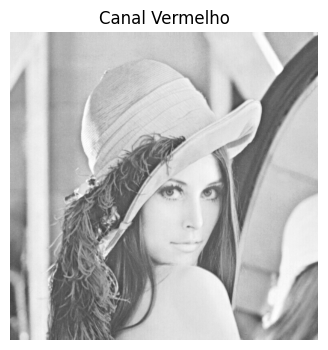

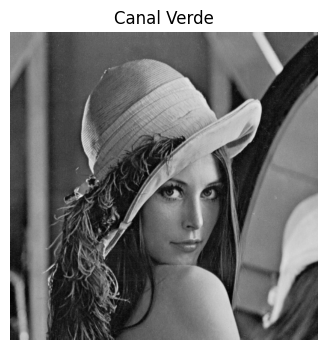

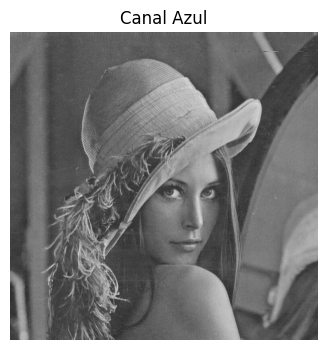

In [204]:
r = lenna_color[:, :, 0]
g = lenna_color[:, :, 1]
b = lenna_color[:, :, 2]

show_image(r, title='Canal Vermelho')
show_image(g, title='Canal Verde')
show_image(b, title='Canal Azul')

### Editando Canais de Cor e Combinando
Vamos desenhar círculos em cada canal de cor da imagem Lenna. Esses círculos se sobreporão em algumas partes, criando diferentes cores na imagem final combinada.

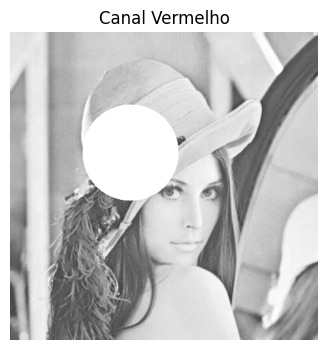

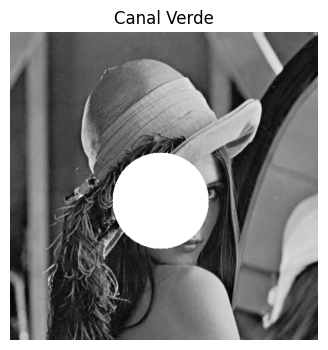

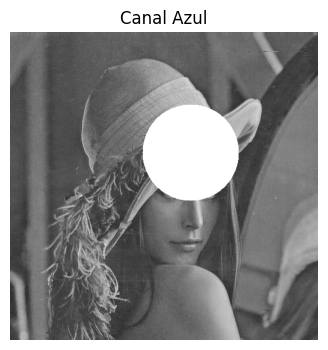

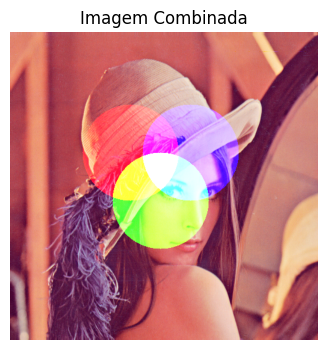

In [205]:
def draw_circle(image, center, radius, intensity):
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            if (x - center[0])**2 + (y - center[1])**2 <= radius**2:
                image[y, x] = intensity
    return image

# Desenhando círculos nos canais
r_circle = draw_circle(r.copy(), (200, 200), 80, 255)
g_circle = draw_circle(g.copy(), (250, 280), 80, 255)
b_circle = draw_circle(b.copy(), (300, 200), 80, 255)

show_image(r_circle, title='Canal Vermelho')
show_image(g_circle, title='Canal Verde')
show_image(b_circle, title='Canal Azul')

# Combinando os canais
combined_image = np.stack([r_circle, g_circle, b_circle], axis=-1)
show_image(combined_image, title='Imagem Combinada')

## Filtros de Imagem

Filtros de imagem são ferramentas essenciais em visão computacional e processamento de imagens. Eles são usados para várias finalidades, como realçar características, reduzir ruídos, detectar bordas, etc.

Filtros aplicam uma operação matemática sobre um grupo de pixels (vizinhança) em uma imagem para produzir um novo valor de pixel. Eles são geralmente representados por matrizes chamadas "kernels".

### Operação de Convolução
A convolução é uma operação matemática utilizada para aplicar filtros a uma imagem. A operação de convolução envolve passar o kernel sobre a imagem, calculando a soma ponderada dos pixels cobertos pelo kernel.

A operação de convolução pode ser descrita da seguinte maneira:
1. Posicione o kernel sobre a imagem de modo que o centro do kernel esteja alinhado com um pixel específico.
2. Multiplique cada valor no kernel pelo valor do pixel correspondente na imagem.
3. Some todos os produtos obtidos no passo anterior.
4. O valor resultante é atribuído ao pixel central na imagem de saída.
5. Repita o processo para cada pixel na imagem.

Matematicamente, a convolução para uma imagem $I$ e um kernel $K$ pode ser descrita como:

$(I * K)(i, j) = \sum_{m} \sum_{n} I(i+m, j+n) \cdot K(m, n)$

onde $i$ e $j$ são as coordenadas do pixel na imagem de saída, e $m$ e $n$ são os índices dos elementos do kernel.

### Exemplo de Kernel
Um kernel 3x3 para suavização (média) pode ser representado da seguinte forma:

$K = \frac{1}{9} \begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 \\
\end{bmatrix}$

### Aplicando Filtros

Vamos implementar uma função chamada `apply_filter` que recebe uma imagem e um kernel, e aplica o filtro na imagem utilizando convolução.

In [206]:
def apply_filter(image, kernel):
    # Obtendo as dimensões da imagem e do kernel
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Calculando as bordas para o padding
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Aplicando padding na imagem
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    
    # Inicializando a imagem filtrada
    filtered_image = np.zeros_like(image)
    
    # Aplicando a convolução
    for i in range(img_height):
        for j in range(img_width):
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            filtered_value = np.sum(region * kernel)
            filtered_image[i, j] = np.clip(filtered_value, 0, 255)
    
    return filtered_image

### Filtro de Suavização (Blur)

Um kernel 3x3 para suavização (média) pode ser representado da seguinte forma:

$K = \frac{1}{9} \begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 \\
\end{bmatrix}$

Vamos aplicar um filtro de suavização utilizando um kernel 3x3 para calcular a média dos pixels vizinhos.

Kernel de Suavização (Blur):
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


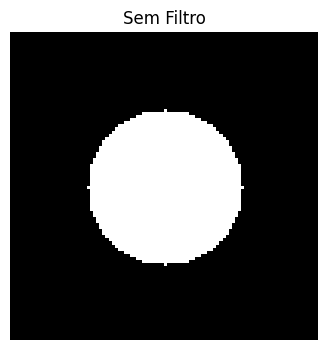

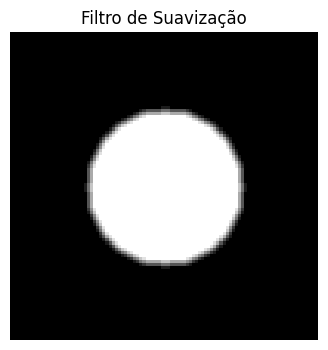

In [207]:
blur_kernel = np.ones((3, 3)) / 9

print("Kernel de Suavização (Blur):")
print(blur_kernel)

blurred_circle = apply_filter(circle_image, blur_kernel)

show_image(circle_image, title='Sem Filtro')
show_image(blurred_circle, title='Filtro de Suavização')

### Filtro de Detecção de Bordas (Sobel)

Um kernel Sobel para detecção de bordas horizontais pode ser representado da seguinte forma:

$K_x = \frac{1}{9} \begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 \\
\end{bmatrix}$

Vamos aplicar o filtro Sobel para detectar bordas horizontais e verticais na imagem Lenna.

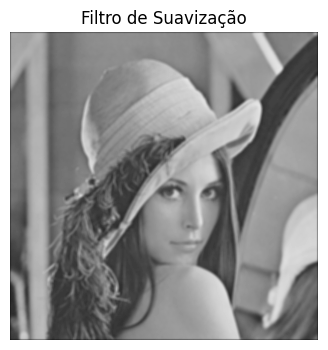

In [208]:
blur_kernel = np.ones((5, 5)) / 25
lenna_blur = apply_filter(lenna_gray, blur_kernel)

show_image(lenna_blur, title='Filtro de Suavização')

Kernel Sobel para detecção de bordas horizontais (Sobel X):
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


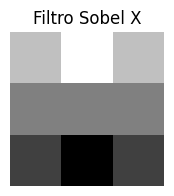

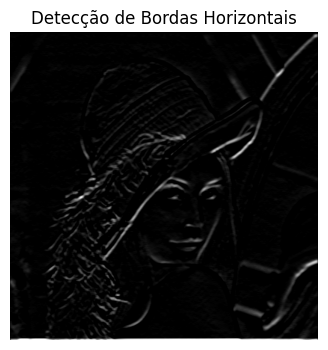

In [210]:
sobel_x_kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

print("Kernel Sobel para detecção de bordas horizontais (Sobel X):")
print(sobel_x_kernel)

sobel_x_lenna = apply_filter(lenna_blur, sobel_x_kernel)

show_image(sobel_x_kernel, title='Filtro Sobel X', vmin=-2, vmax=2, figsize=(2, 2))
show_image(sobel_x_lenna, title='Detecção de Bordas Horizontais')

Kernel Sobel para detecção de bordas verticais (Sobel Y):
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


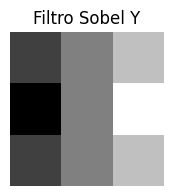

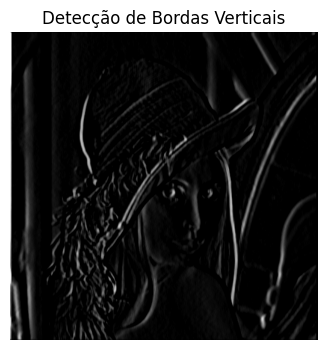

In [212]:
sobel_y_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

print("Kernel Sobel para detecção de bordas verticais (Sobel Y):")
print(sobel_y_kernel)

sobel_y_lenna = apply_filter(lenna_blur, sobel_y_kernel)

show_image(sobel_y_kernel, title='Filtro Sobel Y', vmin=-2, vmax=2, figsize=(2, 2))
show_image(sobel_y_lenna, title='Detecção de Bordas Verticais')

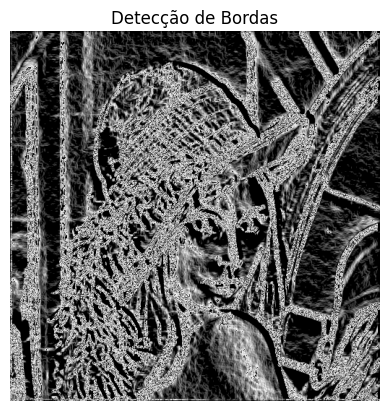

In [ ]:
# Calculando a magnitude do gradiente
sobel_lenna = np.sqrt(sobel_x_lenna**2 + sobel_y_lenna**2)
sobel_lenna = (sobel_lenna / sobel_lenna.max()) * 255
sobel_lenna = sobel_lenna.astype(np.uint8)

show_image(sobel_lenna, title='Detecção de Bordas')

#### Direção do Gradiente (Quiver)
Vamos visualizar a direção do gradiente utilizando um gráfico de vetores (quiver). Isso nos ajudará a entender a orientação das bordas detectadas pelo filtro Sobel.

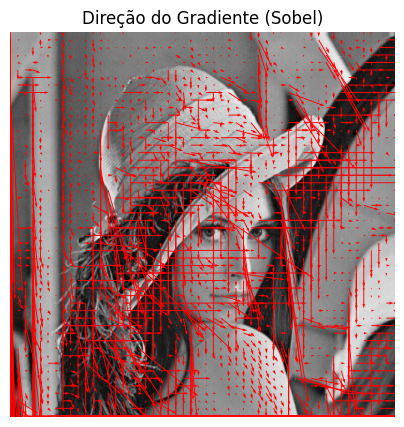

In [ ]:
direction = np.arctan2(sobel_y_lenna, sobel_x_lenna)

# Plotar os vetores de gradiente
step = 10

plt.figure(figsize=(5, 5))
plt.imshow(lenna_gray, cmap='gray')

y, x = np.mgrid[0:lenna_gray.shape[0]:step, 0:lenna_gray.shape[1]:step]
u = sobel_x_lenna[::step, ::step]
v = sobel_y_lenna[::step, ::step]

plt.quiver(x, y, u, v, color='red', angles='xy', scale_units='xy', scale=1, minlength=0.1)

plt.title('Direção do Gradiente (Sobel)')
plt.axis('off')
plt.show()

## Exercícios

### Exercício 1: Aplicando Diferentes Filtros de Suavização
Experimente aplicar diferentes tamanhos de kernels de suavização (blur) na imagem Lenna em grayscale. Observe o efeito de cada kernel na imagem.

1. Aplique um filtro de suavização com um kernel 5x5.
2. Aplique um filtro de suavização com um kernel 7x7.
3. Compare os resultados.

## Exercício 2: Aplicando Filtros Personalizados
Crie e aplique filtros personalizados na imagem Lenna em grayscale. 

1. Crie um kernel 3x3 que realce as bordas diagonais.
2. Crie um kernel 3x3 que aplique um efeito de nitidez.
3. Aplique os filtros e observe os resultados.